In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/up_data.csv")
data.shape

(65, 3)

In [2]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(64):
    x1.append(x[i])
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [3]:
hypothesis=B+X1*W1+X2*W2
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001) # 2차 함수 : 0.000000001
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [4]:
for step in range(5000):
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1,X2:x2, Y:y1})
    if step % 1000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  55460584.0 
Prediction:
 [2093.8708 2108.8833 2108.8833 2108.8833 2093.8708 2108.8833 2123.9238
 2108.8833 2583.294  3318.8398 4039.3003 4770.4644 5270.054  5794.2153
 6193.5767 6591.328  6930.6895 7176.4033 7450.5625 7682.581  7873.873
 8056.4653 8228.469  8387.6875 8497.186  8575.605  8676.005  8737.145
 8796.637  8838.6045 8866.308  8885.661  8893.566  8896.706  8888.464
 8876.439  8868.413  8829.078  8842.159  8770.874  8716.669  8678.726
 8636.5    8750.51   8556.09   8501.498  8462.335  8377.061  8120.0713
 8230.744  8230.744  8176.7754 8120.0713 8090.673  8029.7314 7932.783
 7898.9463 7898.9463 7792.7275 7792.7275 7755.711  7717.869  7679.1875
 7639.66  ] 
W1:[1.2714144],B:[0.6657796]
1000 Cost:  0.09172905 
Prediction:
 [0.59630334 0.5962291  0.5962291  0.5962291  0.59630334 0.5962291
 0.59616154 0.5962291  0.59757143 0.6152493  0.6542654  0.72099197
 0.7860812  0.87566483 0.96199584 1.0674663  1.1767552  1.2697992
 1.3910232  1.5118418  1.6277516  1.7564008  1.8992258

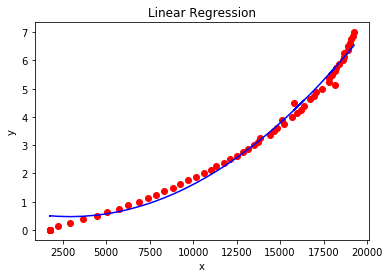

In [5]:
# W1:[0.00016793],B:[-0.88223064]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1)+x2*sess.run(W2), 'b')
# X=5 일때의 계산 값
plt.show()